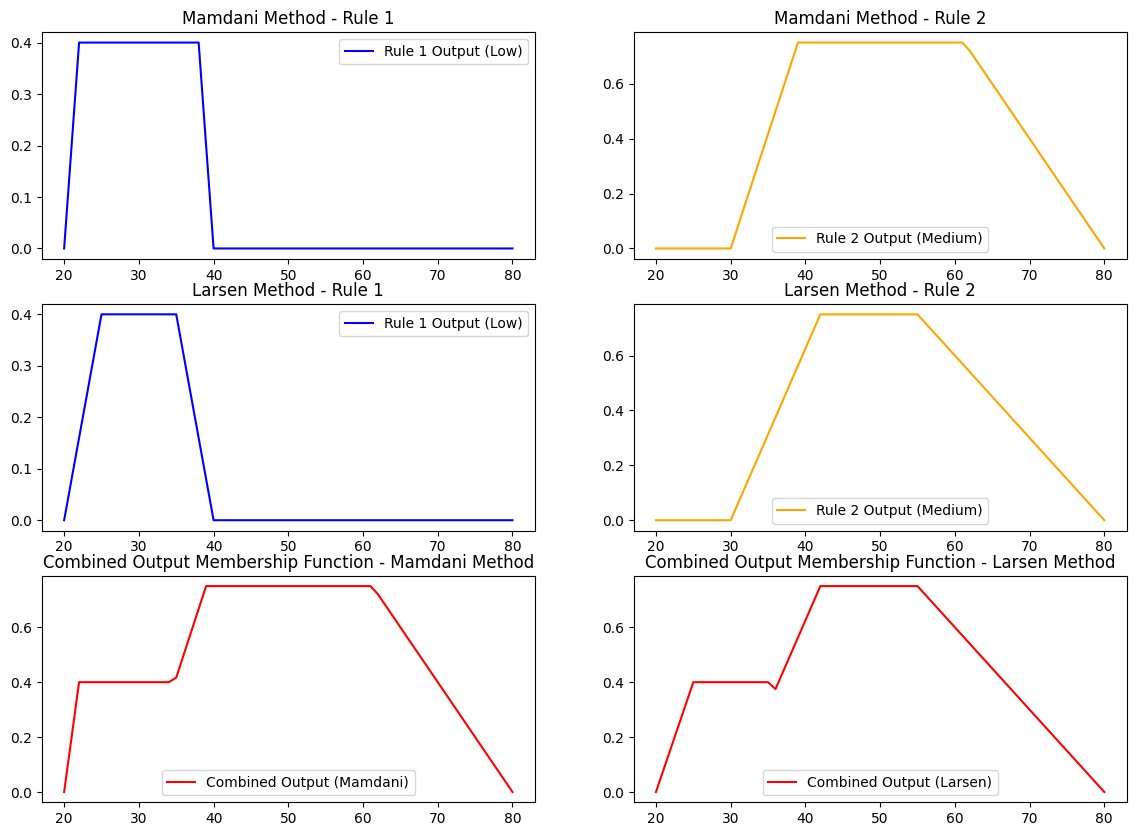

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def membership_low(x):
    if x <= 20:
        return 0
    elif 20 < x <= 25:
        return (x - 20) / 5
    elif 25 < x <= 35:
        return 1
    elif 35 < x <= 40:
        return (40 - x) / 5
    else:
        return 0

def membership_med(x):
    if x <= 30:
        return 0
    elif 30 < x <= 42:
        return (x - 30) / 12
    elif 42 < x <= 55:
        return 1
    elif 55 < x <= 80:
        return (80 - x) / 25
    else:
        return 0

universe = np.arange(20, 81, 1)

low_vals = [membership_low(x) for x in universe]
med_vals = [membership_med(x) for x in universe]

activation_level_rule1 = 0.4
output_set_rule1 = 'Low'

activation_level_rule2 = 0.75
output_set_rule2 = 'Medium'

# Mamdani Method
# Rule 1
output_mamdani_rule1 = [min(activation_level_rule1, membership_low(x)) for x in universe]
# Rule 2
output_mamdani_rule2 = [min(activation_level_rule2, membership_med(x)) for x in universe]

# Larsen Method
# Rule 1
output_larsen_rule1 = [activation_level_rule1 * membership_low(x) for x in universe]
# Rule 2
output_larsen_rule2 = [activation_level_rule2 * membership_med(x) for x in universe]

combined_output_mamdani = [max(output_mamdani_rule1[i], output_mamdani_rule2[i]) for i in range(len(universe))]
combined_output_larsen = [max(output_larsen_rule1[i], output_larsen_rule2[i]) for i in range(len(universe))]

plt.figure(figsize=(14, 10))
gs = GridSpec(3, 2, figure=plt.gcf())

ax1 = plt.subplot(gs[0, 0])
ax1.plot(universe, output_mamdani_rule1, 'blue', label='Rule 1 Output (Low)')
ax1.set_title('Mamdani Method - Rule 1')

ax1.legend()

ax2 = plt.subplot(gs[0, 1])
ax2.plot(universe, output_mamdani_rule2, 'orange', label='Rule 2 Output (Medium)')
ax2.set_title('Mamdani Method - Rule 2')
ax2.legend()

ax3 = plt.subplot(gs[1, 0])
ax3.plot(universe, output_larsen_rule1, 'blue', label='Rule 1 Output (Low)')
ax3.set_title('Larsen Method - Rule 1')
ax3.legend()

ax4 = plt.subplot(gs[1, 1])
ax4.plot(universe, output_larsen_rule2, 'orange', label='Rule 2 Output (Medium)')
ax4.set_title('Larsen Method - Rule 2')
ax4.legend()

ax5 = plt.subplot(gs[2, 0])
ax5.plot(universe, combined_output_mamdani, 'red', label='Combined Output (Mamdani)')
ax5.set_title('Combined Output Membership Function - Mamdani Method')
ax5.legend()

ax6 = plt.subplot(gs[2, 1])
ax6.plot(universe, combined_output_larsen, 'red', label='Combined Output (Larsen)')
ax6.set_title('Combined Output Membership Function - Larsen Method')
ax6.legend()
